,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.10,...,IT/IS,Peter Monroe,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0,2/12/2019,0.0
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,1/7/2019,0.0
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.80,...,IT/IS,Peter Monroe,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0,1/14/2019,0.0
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.00,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0,1/2/2019,0.0


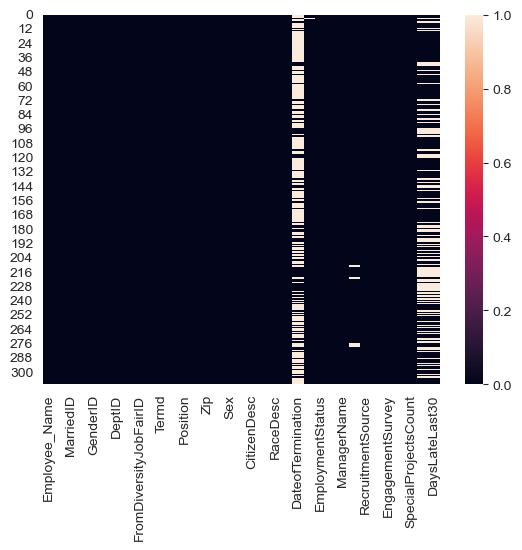

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import gmplot
from IPython.display import IFrame
from datetime import date

#styles
sns.set_style('darkgrid')

#imports
df = pd.read_csv('HRDataset.csv')
df_all = pd.read_csv('HRDataset.csv')


#preps
df.dropna(thresh=2,inplace=True)
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

sns.heatmap(df.isnull())
df

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

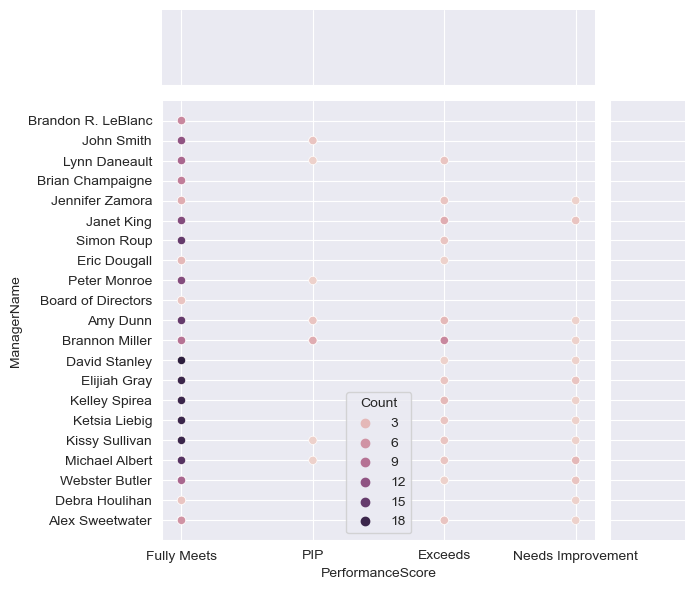

In [86]:
#ocena produktywnosci + o co chodzi z ym błędem? :c
df['Count'] = df.groupby(['PerformanceScore', 'ManagerName'])['ManagerID'].transform('count')
sns.jointplot(x='PerformanceScore',y='ManagerName',data=df, hue='Count')


In [ ]:
#manager sex vs performance - problem z mapowaniem plci managera z tego samego df
# df['ManagerSex'] = df['ManagerName'].map(df['Sex'])
# g = sns.FacetGrid(data=df,col='Department',row='ManagerSex')
# g.map(plt.scatter,'PerformanceScore','ManagerSex')
# df

In [ ]:
def count_seniority(row):
    start_date = row['DateofHire']

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - start_date)/np.timedelta64(1,'Y') #np.timedelta!!!!

df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)
df[['DateofHire','DateofTermination','Seniority']].head()

,DateofHire,DateofTermination,Seniority
0,2008-10-27,NaT,10.923288
1,2014-01-06,NaT,5.726027
2,2014-09-29,NaT,4.997260
3,2015-02-16,2015-04-15,0.158904
4,2015-05-01,NaT,4.410959


TypeError: The y variable is categorical, but one of ['numeric', 'datetime'] is required

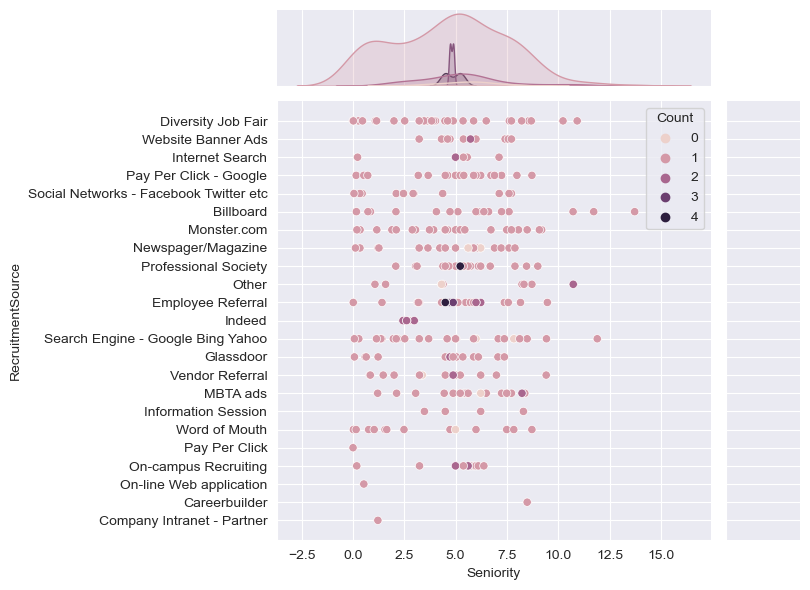

In [ ]:
df['Count'] = df.groupby(['Seniority', 'RecruitmentSource'])['ManagerID'].transform('count') #co się dzieje co się dzieje xdd
chart = sns.jointplot(x='Seniority', y='RecruitmentSource', data=df, hue='Count') 
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right') #jak przekrecic tiki o 90 stopni? (!!!)

#dlaczego nie zliczz alegancko ilości na osi y?

plt.show()

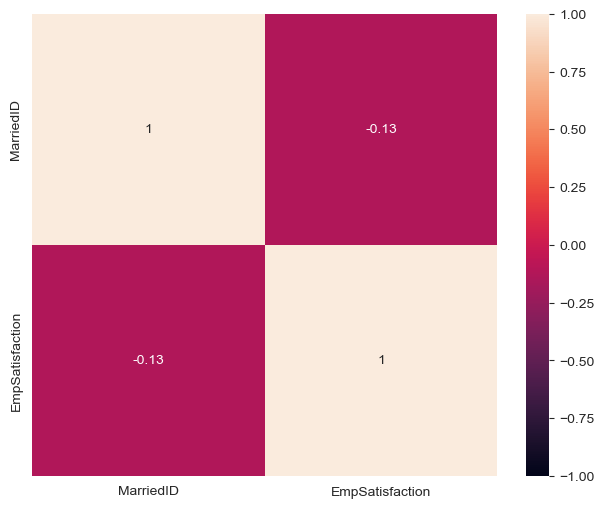

In [ ]:
plt.figure(figsize=(7.5, 6))
sns.heatmap(df[['MarriedID', 'EmpSatisfaction']].corr(), vmin=-1, vmax=1, annot=True)
plt.show()

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


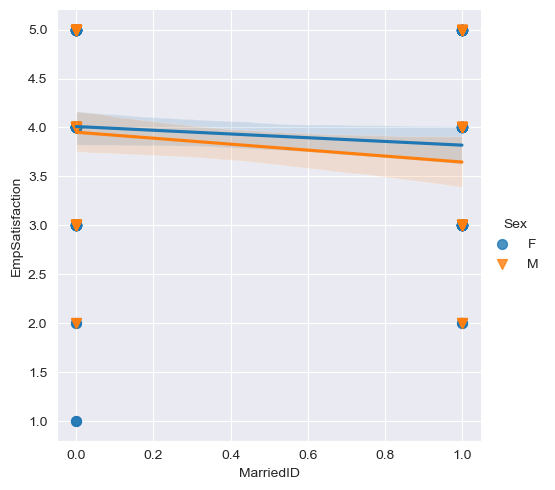

In [ ]:
sns.lmplot(x='MarriedID',y='EmpSatisfaction',data=df,hue='Sex',markers=['o','v'], scatter_kws={'s':50})
#TAKŻE TEGO XD


/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


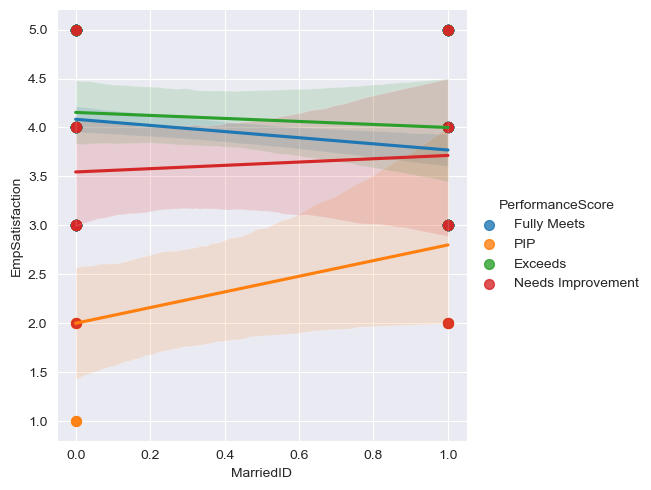

In [ ]:
sns.lmplot(x='MarriedID',y='EmpSatisfaction',data=df,hue='PerformanceScore', scatter_kws={'s':50})
#dane nie kłamią xd

/var/folders/qs/rq5n_22j7s9gctbn9f0bxfgr0000gn/T/ipykernel_51199/36858661.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


0      36.210959
1      39.791781
2      37.441096
3      38.400000
4      35.726027
         ...    
305   -27.983562
306    37.800000
307    41.002740
308   -41.635616
309    45.780822
Name: Age, Length: 310, dtype: float64

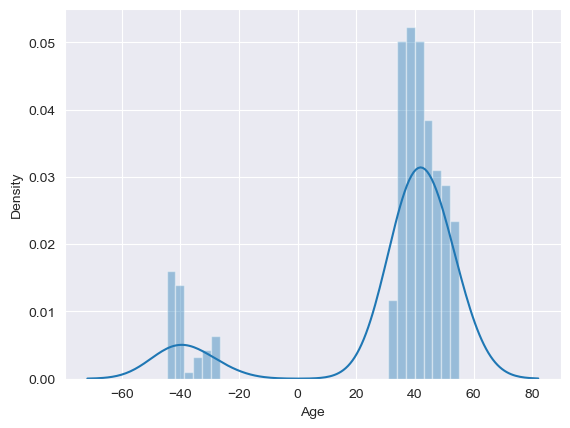

In [90]:
def age(row):
    today = pd.Timestamp(date.today())

    if pd.isnull(row['DOB']):
        age = 0
    else:
        age = today - row['DOB']

    return age/np.timedelta64(1,'Y') #np.timedelta!!!!

df['Age'] = df.apply(lambda row: age(row),axis=1)

sns.distplot(df['Age'])
df['Age']
#tak, niektórzy pracownicy jeszcze nie przyszli na świat xd Co za smutna utopia, w której wiadomo gdzie będą pracowały dziaci które sie urodzą za 40 lat

/var/folders/qs/rq5n_22j7s9gctbn9f0bxfgr0000gn/T/ipykernel_51199/3636337233.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Count'] = filtered_df.groupby(['Seniority', 'SpecialProjectsCount'])['ManagerID'].transform('count') #co się dzieje co się dzieje xdd


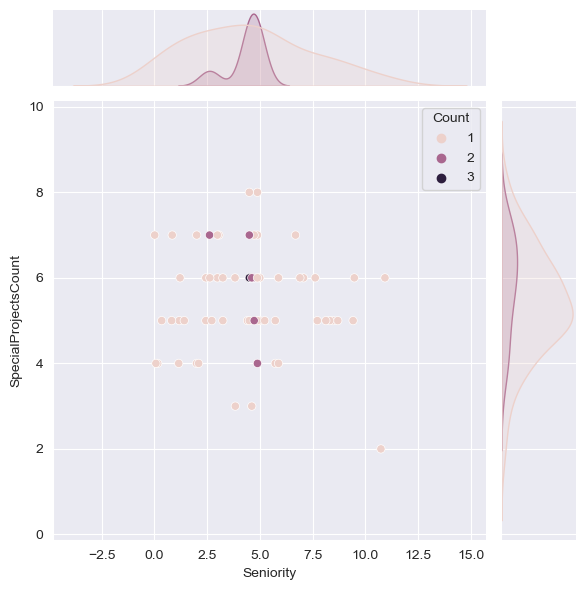

In [105]:
def count_seniority(row):
    start_date = row['DateofHire']

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - start_date)/np.timedelta64(1,'Y') #np.timedelta!!!!

df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)
filtered_df = df[df['SpecialProjectsCount'] > 0]

filtered_df['Count'] = filtered_df.groupby(['Seniority', 'SpecialProjectsCount'])['ManagerID'].transform('count') #co się dzieje co się dzieje xdd
chart = sns.jointplot(x='Seniority', y='SpecialProjectsCount', data=filtered_df, hue='Count') 